# Generate Kaplan Meier Curves 

### Install Necessary Plotting Library
To plot kaplan meier curves the _lifelines_ library is required 

In [1]:
!pip install lifelines

  Using cached lifelines-0.27.4-py3-none-any.whl (349 kB)
  Using cached autograd_gamma-0.5.0-py3-none-any.whl
  Using cached autograd-1.5-py3-none-any.whl (48 kB)
  Using cached formulaic-0.5.2-py3-none-any.whl (77 kB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (30.9 MB)
  Using cached future-0.18.3-py3-none-any.whl
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached interface_meta-1.3.0-py3-none-any.whl (14 kB)
  Using cached wrapt-1.15.0-cp310-cp310-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (78 kB)


In [2]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [3]:
from Analysis import Analysis
from Database import Database

## Find prostate cancer patients
Use the Database Class to find mrns for prostate cancer patients

In [10]:
d = Database()

Connect To Database


encryption key: ········


Connected: {'user': 'admin', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,rad_onc,public', 'sslmode': 'require', 'sslcompression': '0', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [11]:
patient_filter=[{'tag': 'diagnosis', 'attribute': 'value', 'value': ['C61:malignant_neoplasm_of_prostate']}]
print(f"{patient_filter=}")
mrns = d.get_mrns_where_tag_value(patient_filter)
print(f"mrns:{mrns}")

# Close Database Class
del d

patient_filter=[{'tag': 'diagnosis', 'attribute': 'value', 'value': ['C61:malignant_neoplasm_of_prostate']}]
mrns:['111111' '333333']


### Create an instance of the Analysis class

In [6]:
a = Analysis()

Connect To Database


encryption key: ········


Connected: {'user': 'admin', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,rad_onc,public', 'sslmode': 'require', 'sslcompression': '0', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


## Define start and event
What tag defines the start time (eg. surgery, radiation)
What tag defines an event (eg. death, biochemical_progression)

In [12]:
start_tag = 'c61:surgery'
event_tag = 'c61:biochemical_progression'

### Use the method _kaplan_meier_ to get kaplan meier data

In [13]:
output = a.kaplan_meier(mrns, start_tag, event_tag)
output

{'mrns': ['333333'], 'durations': [75], 'events': [1]}

### Plot The Kaplan Meier Curve

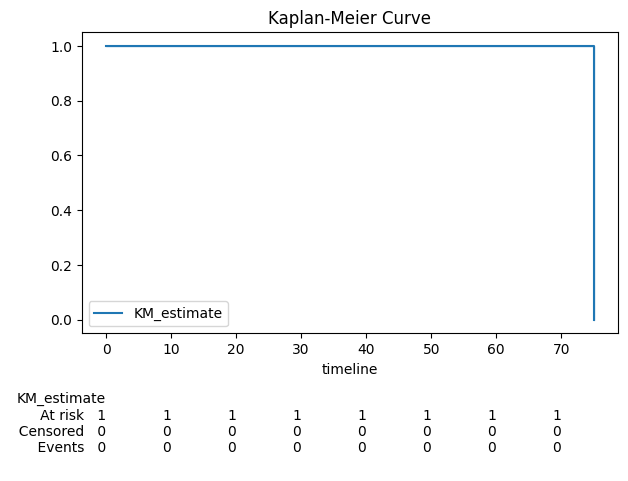

In [14]:
# Extract Data
mrns = output['mrns']
durations = output['durations']
events = output['events']

# Generate Kaplan Meier
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed=events)
kmf.plot_survival_function(at_risk_counts=True)
plt.title('Kaplan-Meier Curve')
plt.show()
plt.close()

In [ ]:
del a